In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [67]:
# 데이터 불러오기 
# index_col=0 : 0번 열을 index로. 여기선 0번열이 pregnancies니까 없이
df = pd.read_csv("../dataset/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [68]:
# 컬렴명 확인
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [69]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [70]:
# 결측치 확인 -> df.info 결과 null값 존재 X -> 0이 결측치로 확인됨
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

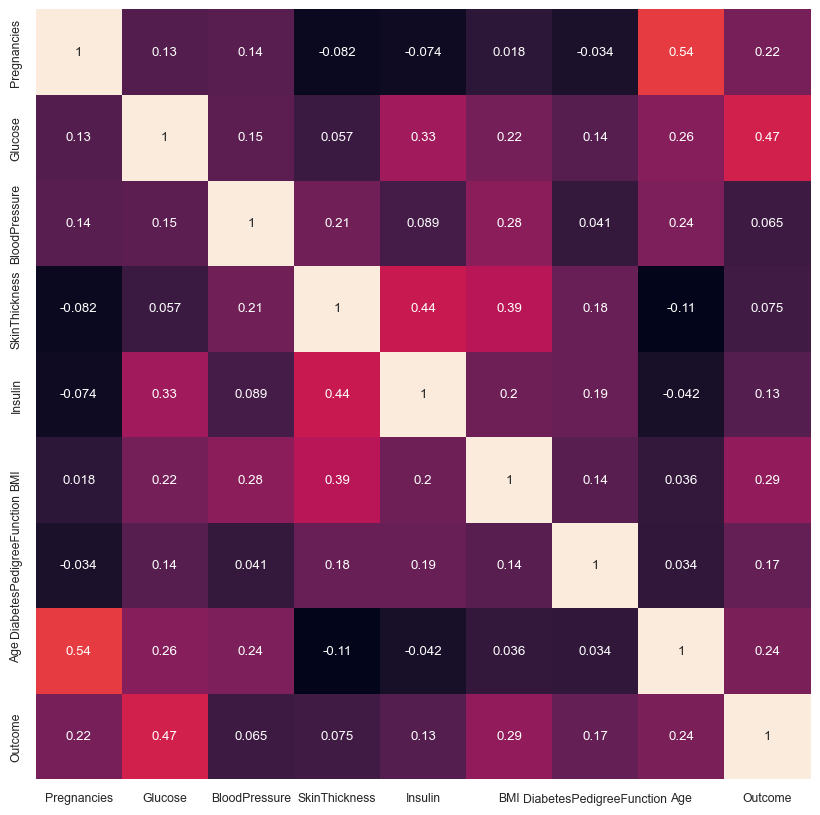

In [71]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# label인 BMI랑 상관관계 높은건 피부두께, 혈압, 혈당 순 ..

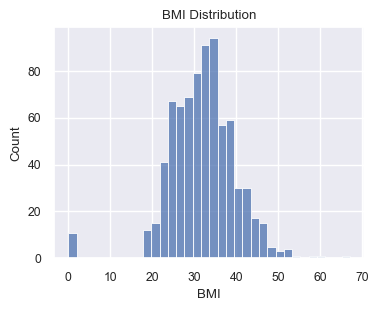

In [72]:
# BMI 분포 시각화
plt.figure(figsize=(4, 3))
sns.histplot(data=df, x="BMI") 
plt.title("BMI Distribution")  
plt.show()

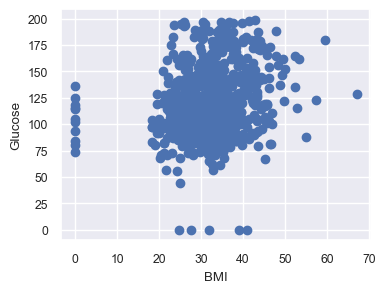

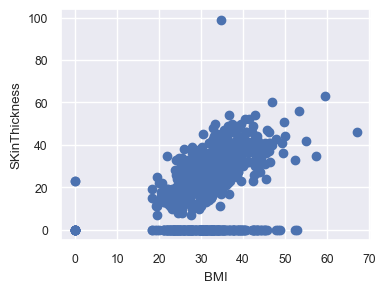

In [73]:
# 산점도 확인 (둘의 관계)

plt.figure(figsize=(4, 3))
plt.scatter(df['BMI'], df['Glucose'])
plt.xlabel('BMI')
plt.ylabel('Glucose')

plt.show()

plt.figure(figsize=(4, 3))
plt.scatter(df['BMI'], df['SkinThickness'])
plt.xlabel('BMI')
plt.ylabel('SKinThickness')

plt.show()

In [74]:
# 혈당, 혈압, 피부두께, 체질량지수가 0으로 나오는 값 : 이상치로 판단
# 인슐린 -> 0일수도있지만, 너무 많음. 이상치로 판단
# 피부두께도 너무 많음. 
print("제거 전: ", len(df))
df = df[(df[['Glucose', 'BloodPressure','BMI']] != 0).all(axis=1)]
print("제거 후: ", len(df))

제거 전:  768
제거 후:  724


In [75]:
# 0값을 nan으로 대체. (평균으로 바꾸기위해 ) 
df[['SkinThickness', 'Insulin']] = df[['SkinThickness', 'Insulin']].replace(0, np.nan)

# SkinThickness와 Insulin의 NaN 값을 평균값으로 대체
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())

/var/folders/nr/9d9y7mfn50b3sc_ncv28vstc0000gn/T/ipykernel_19843/897862106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['SkinThickness', 'Insulin']] = df[['SkinThickness', 'Insulin']].replace(0, np.nan)
/var/folders/nr/9d9y7mfn50b3sc_ncv28vstc0000gn/T/ipykernel_19843/897862106.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
/var/folders/nr/9d9y7mfn50b3sc_ncv28vstc0000gn/T/ipykernel_19843/897862106.py:6: SettingWithCo

In [76]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,156.056122,33.6,0.627,50,1
1,1,85,66,29.000000,156.056122,26.6,0.351,31,0
2,8,183,64,29.182331,156.056122,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,156.056122,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,29.182331,156.056122,30.1,0.349,47,1


In [77]:
y = df['BMI']
y

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 724, dtype: float64

In [78]:
X = df.drop(['Outcome', 'BMI'] ,axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35.000000,156.056122,0.627,50
1,1,85,66,29.000000,156.056122,0.351,31
2,8,183,64,29.182331,156.056122,0.672,32
3,1,89,66,23.000000,94.000000,0.167,21
4,0,137,40,35.000000,168.000000,2.288,33


In [79]:
from sklearn.model_selection import train_test_split

# 훈련데이터와, 검증, 테스트 데이터로 분할 
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((463, 7), (463,), (145, 7), (145,))

In [80]:
# 표준화 StandardScaler 
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
val_scaled = ss.transform(X_val)
test_scaled = ss.transform(X_test)

In [81]:
from keras.layers import Dense, Flatten
from keras.models import Sequential

model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(7,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))

model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,225 (8.69 KB)

 Trainable params: 2,225 (8.69 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
N_EPOCHS =20
history = model.fit(train_scaled, y_train, epochs=N_EPOCHS, batch_size=32, validation_data=(val_scaled, y_val))


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1085.6591 - mse: 1085.6591 - val_loss: 1144.0435 - val_mse: 1144.0435
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1055.1672 - mse: 1055.1672 - val_loss: 1092.9188 - val_mse: 1092.9188
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1005.0716 - mse: 1005.0716 - val_loss: 984.6006 - val_mse: 984.6006
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 877.1656 - mse: 877.1656 - val_loss: 768.2260 - val_mse: 768.2260
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 644.8574 - mse: 644.8574 - val_loss: 435.0873 - val_mse: 435.0873
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 386.0143 - mse: 386.0143 - val_loss: 208.0277 - val_mse: 208.0277
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 230.6696 - mse: 230.6696 - val_loss: 181.5079 - val_mse: 181.5079
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 177.8472 - mse: 177.8472 - val_loss: 148.9287 - val_mse: 148.928

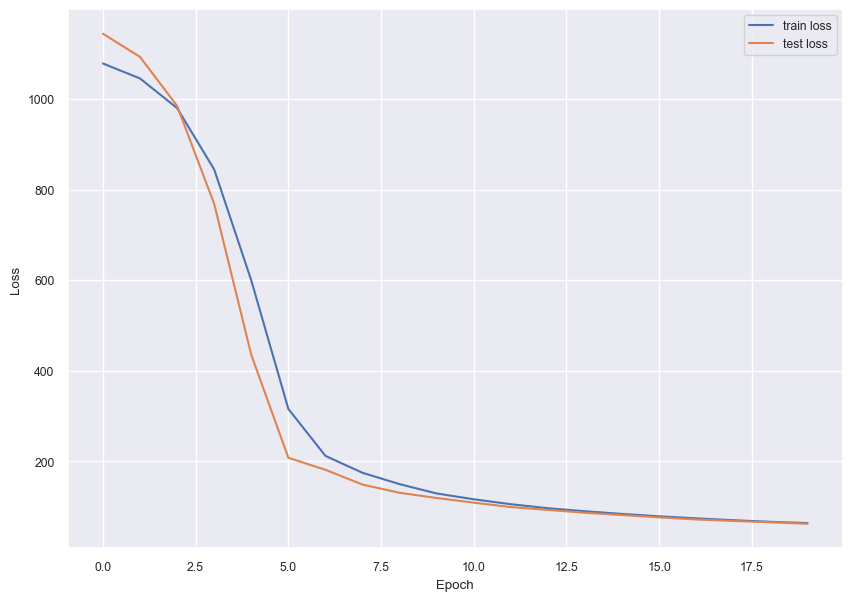

In [83]:
# loss 체크

plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [105]:
model.evaluate(test_scaled, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 63.1992 - mse: 63.1992


[70.12474060058594, 70.12474060058594]